## Intruduction

In this project the data that I am going to be using is my excersize data that I have acquired from apple health. The data is gathered by my apple watch over the past 6 months. It is not filled with months straight of workouts as some days I forgot to wear my watch, it was dead or mainly I simply did not workout that day. I chose to research this data because I love to workout specifically to lift weights which is why all the data that is used in this project is data specifically of weightlifting. Weightlifting is something I got into in high school and I do not plan to stop anytime soon. I find it a fun way to stay healthy and I find that it really helps my mental health as well. Because of this I decided it would be very interesting to research it and try to find any patterns in my workouts especially since coming to college. This can help me to look back at something I do and realize how outside factors affect it and try to find things that affect when I workout. 

The data in inluceds 7 attributes
* Date: this is simply the date of the workout in the format YYYY-MM-DD  
* Activity Type: This just declares the activity type which is Traditional Strength Training  
* Duration: This is the duration of the workout that is originally in seconds but during the cleaning part of this project gets turned into minutes  
* Total Energy Burned: This attribute gives the total energy burned and is given in Kcals
* HKAverageMETs: This is the amount of Kcals I burn per hour times my weight in kilograms

However I will be merging two tables to this to give it more attributes. This data-set is in a csv format and was accuried from my apple-health app however when exporting direction from the app it gives it in xml format so I used the [Auto Export](https://www.healthexportapp.com) app so that I could export it in a csv file. This made loading and cleaning the data alot simpler.

I am going to be merging two other tables with this data. The first table that I am going to be adding is a day_month table. It includes a date and the day of the week and month that the date was in. This will allow me to do different tests on my data relating to when I worked out. Here is the attributes in the dataset:
* Month: The month that the instance occured in
* Day of Week: The day of the week that the instance occured in.

The other table that I have is going to be a data set that includes weather details daily. It is going to have a date which is what is going to be used for all of the merges in this project. I used [Meteo Stats](https://dev.meteostat.net/api/#sign-up) api to gather this data and there is more information on it in the loading section where I cleaned and joined the data. The attributes for the weather data are:
* tavg: The average temperature in the day in Fahrenheit.
* prcp: The daily precipitation levels in inches
* wdir: the direction of the wind in degrees
* wdsp: The average windspeed in miles per hour
* pres: The average sea-level air pressure

The attribute that I am going to be trying to predict is an attribute that I am going to add in the loading section. This attribute is called "Workout" and is a simple Y or N and it tells whether or not I worked out on that particular day. I am going to use some of the weather attributes as the feature matrix to see if they can predict the class label. 

The potential impacts of the results would be finding patterns in the weather and how it affects my ability to workout. It would give me a chance to be fully aware of how I much I do or don't workout in correlation to the weather. This can help me to realize when I am going to not want to workout and when I most likely do not workout and instead push myself and workout. It will help me to improve upon one of the things I really like to do and will help me to get better at it. Results in the EDA section will also help me to recognie patterns in my workouts espcecially patterns that show weakness. This will also help me to get better about skipping workouts. This is also where stakeholders should be interested. The stakeholders who would use these results would be groups like declining gym owners who are hoping to bring up attendence. Also another group would be trainers or training apps as they could use this to figure out what times in the month the client is going to be less likely to go because of weather. 

## Loading and Cleaning the data
We are going to start by loading the workout data into a pandas dataframe. This will allow us to perform many different types of Exploratory Data Analysis techniques. Once loaded I am going to clean the data by getting rid of attributes that are unneccesary to this project. The attributes we are going to be getting rid of is "type","sourceName","sourceVersion","productType","device","durationUnit","totalDistance","totalSwimmingStrokeCount","totalFlightsClimbed","HKTimeZone","HKWeatherTemperature","HKIndoorWorkout", "HKWeatherHumidity". These attributes are simply not neccesary. 


In [1670]:
import pandas as pd
from scipy import stats
import utils
import importlib
importlib.reload(utils)

df = pd.read_csv("workout_data.csv")
day_month_df = pd.read_csv("day_month.csv")
weather_df = pd.read_csv("Spokane_daily_weather_cleaned.csv")
df.drop(["type","sourceName","sourceVersion","productType","device","durationUnit","totalDistance","totalSwimmingStrokeCount","totalFlightsClimbed","HKTimeZone","HKWeatherTemperature","HKIndoorWorkout","HKWeatherHumidity","endDate"],axis=1,inplace=True)

<module 'utils' from '/Users/jimothyjansma/CPSC222/project/utils.py'>

After loading now I am going to be cleaning the start date so that it is just the date and not the exact time of day. At this time I am also going to be cleaning the "totalEnergyBurned" attribute by getting rid of the kcal and converting the attribute so that it is all floats and not strings. Finally just like I did for the "totalEnergyBurned" attribute I am going to do the same thing for the "HKAverageMETs" attribute.

In [1635]:
utils.split_keep_string(df,"Date")
utils.split_conv_float(df,"totalEnergyBurned")
utils.clean_duration(df)
utils.split_conv_float(df,"HKAverageMETs")

Next I am going to be merging the table that contains the day of the week and the month with the workout data so that I can analyze the data better. I have to clean the month day_month because the dates are formatted differently so I simply split each date by "/" and reorder it and seperate the year, month, and day with "-" instead so that they can be joined. Once merged I am going to write the cleaned data to a csv file. 

In [1636]:
utils.clean_date(day_month_df)
day_month_df.to_csv("clean.csv")
clean_df = df.merge(day_month_df, on=["Date"],how="inner")
clean_df.to_csv("clean_workout.csv",index=False)

Now that the dats and month table has been merged with my data set I am going to be merging another data set and this data set includes the weather data over the duration of my workouts. It was gathered using the [Meteo Stats](https://dev.meteostat.net/api/#sign-up) api specifically their Weather History API. It allows me to get daily weather data which includes attribute like temp, precipitation, and wind speed. I am going to drop unneccesary columns like tmin and tmax as for this project I will only need the tavg. I am going to be doing an outer join for this table because I am going to need to have the weather on the days I do not workout as well. Once it is merged I am also going to add another attribute called Workout and it is going to just be a Y or a N based on wether our not I worked out on that date. 

In [1637]:
merged_df = df.merge(weather_df, on=["Date"],how="outer")
merged_df = merged_df.merge(day_month_df, on=["Date"],how='inner')
workout_ser_merged = utils.clean_weather(merged_df)
merged_df["Workout"] = workout_ser_merged
merged_df.to_csv("merged_tmp_workout.csv",index=False)

So now we have the completely merged data table. I printed it to a csv file so that I could see it clearly and so now the original data has the days, months, and weather attributes added to them. 

## Compute summary statistics
Now that we have loaded and cleaned the data I am going to perform Exploratory Data Analysis by using different techniques on the data to help us wrap our minds around the data and to also see if there are any patters in the data. 

First I am going to simply calculate and display the means of the attributes "Duration","total energy burned", and "HKAverageMETs". The mean of this data is going to be the mean of the days I worked out and then the next time is going to be including the days I didn't workout. Im going to calculate these values by taking the column of data in the attribute and making it a pandas series.

Mean: $\frac{1}{n} \sum_{i=1}^{n} x_i$  
Where $n$ = number of values and $x_i=$ data set values

Standard deviation (sample): $s=\sqrt {\frac {\sum _{i=1}^{N}(x_{i}-{\overline {x}})^{2}}{N-1}}$  


In [1638]:
dur = pd.Series(clean_df["duration"])
energy = pd.Series(clean_df["totalEnergyBurned"])
MET = pd.Series(clean_df["HKAverageMETs"])
utils.mean_ser(dur,"Duration")
utils.mean_ser(energy,"Total Energy Burned")
utils.mean_ser(MET,"HKAverageMETs")
dur_sum = dur.sum()
mean = dur_sum / 194
print("Duration mean (including days not working out):",round(mean,2),"mins")
utils.std_ser(dur,"Duration")
utils.std_ser(energy,"Total Energy Burned")
utils.std_ser(MET,"HKAverageMETs")

Duration mean: 74.53  mins
Total Energy Burned mean: 779.08 Kcals
HKAverageMETs mean: 6.96 Kcals/hr * kg
Duration mean (including days not working out): 26.89 mins
Duration standard derivative: 17.54
Total Energy Burned standard derivative: 249.16
HKAverageMETs standard derivative: 1.91


From this we can analyze that on average every time I work out I work out for a mean of 74.53 minutes and burn about 779 kcals every workout. That is the data over the entire period so now I am going to figure out the same means except for the months and then the days. This also shows with days where I didn't workout I would still workout an average of 26.9 minutes everyday. This was figured out because when importing the days and months I could see that there is 194 instances from the start date to the end date. It brings down the average a fair amount though which could mean I didn't workout a lot in these months. The standard derivatives have also been calculated showing the amount of variation or dispersion in these attributes. 

## Month Group by data
Now I am going to calculate data while it is grouped by month. This is going to be done by using pandas and the groupby function. This allows me to group by the different months and then perform calculation on the values in those months. So first we will analyze how many workouts there have been in each month to give background information before analyzing individual statistics. 

April Workout Number: 5
December Workout Number: 2
February Workout Number: 9
January Workout Number: 9
March Workout Number: 10
November Workout Number: 15
October Workout Number: 20


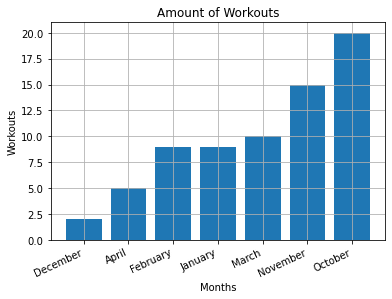

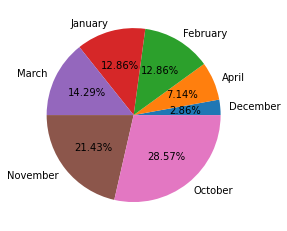

In [1639]:
grouped_by_month = clean_df.groupby("Month")
count_groupby_data_ser = utils.get_total_counts_workouts(grouped_by_month)
count_groupby_data_ser.sort_values(ascending=True,inplace=True)
utils.bar_chart_example(count_groupby_data_ser.index,count_groupby_data_ser,"Amount of Workouts","Months","Workouts")
utils.pie_chart_example(count_groupby_data_ser.index,count_groupby_data_ser,"Amount of Workouts")

This Part of code uses the same techniques as listed as it traverses the grouped by month data fram and takes a count of each workout. The values have been printed out and then a bar graph has been printed with the same values to visualize the data and make it easier to analyze. From this data we can see that October is a clear leader in the amount of workouts with 20 and Decmeber by far being the fewest with a total of 2 workouts in the entire month. The pie chart always works to show the spread of the amount of workouts. December is noticably the smallest and it can be shown through this pie chart. 

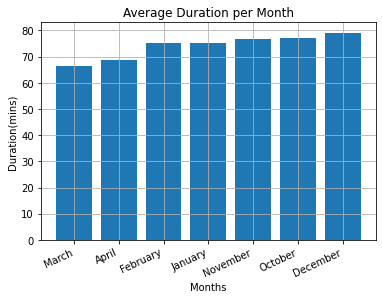

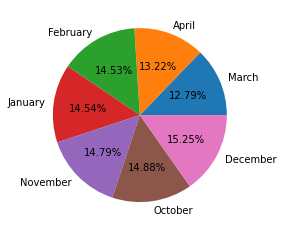

In [1640]:
grouped_by_month = clean_df.groupby("Month")

mean_groupby_data_ser = utils.mean_of_attribute_in_group(grouped_by_month,"duration")
mean_groupby_data_ser.sort_values(ascending=True,inplace=True)

utils.bar_chart_example(mean_groupby_data_ser.index,mean_groupby_data_ser,"Average Duration per Month","Months","Duration(mins)")
utils.pie_chart_example(mean_groupby_data_ser.index,mean_groupby_data_ser,"Average Duration per Month")

This bar chart which shows average duration per month is interesting as it shows that no matter what month it is I am going to be having a very similarly length workout. With December being the month with the highest average duration and March being the lowest. The pie chart is graphing the same data but shows from a percentage standpoint how everything is mostly equal when it comes to average duration in workouts. 

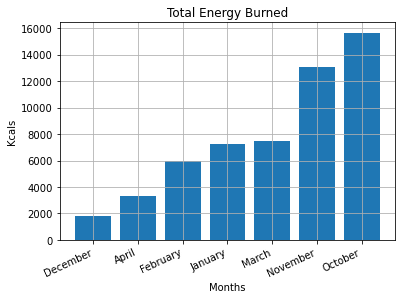

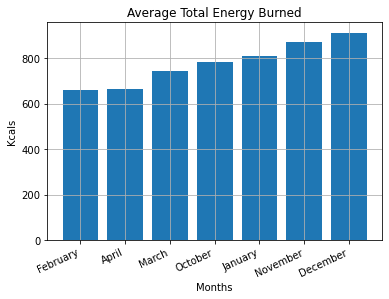

In [1641]:
mean_groupby_data_ser = utils.mean_of_attribute_in_group(grouped_by_month,"totalEnergyBurned")
mean_groupby_data_ser.sort_values(ascending=True,inplace=True)

count_groupby_data_ser = pd.Series(dtype=float)
sum_energy_burn = grouped_by_month["totalEnergyBurned"].sum()
sum_energy_burn.sort_values(ascending=True,inplace=True)


utils.bar_chart_example(sum_energy_burn.index,sum_energy_burn,"Total Energy Burned","Months","Kcals")

utils.bar_chart_example(mean_groupby_data_ser.index,mean_groupby_data_ser,"Average Total Energy Burned","Months","Kcals")



These two bar graphs are extremely interesting as they are both talking about the same attribute except one is a total and one is an average. From the average we can see that in every workout I burn pretty much the same total energy during the months. But from the first graph we can see that in November and October I burned a lot more energy than in any of the other months. Even though I burned the most total energy in those too months we can see that they are not the highest average energy burned compared to December which tells me that in december even tho it was the smallest on the first graph in those few workouts I burned a lot of energy.

## Day Grouped by data
Now I am going to be using the same coding techniques as above except instead of grouping by months now I am going to be grouping by day of the week. 

Friday Workout Number: 12
Monday Workout Number: 13
Saturday Workout Number: 4
Sunday Workout Number: 3
Thursday Workout Number: 12
Tuesday Workout Number: 11
Wednesday Workout Number: 15


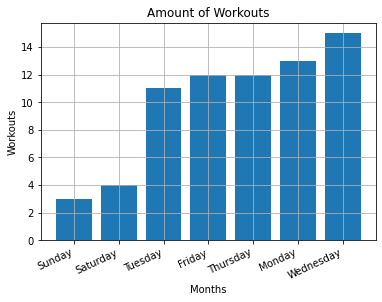

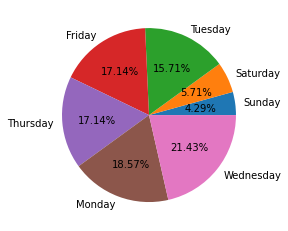

In [1642]:
grouped_by_day = clean_df.groupby("Day of Week")
#grouped_by_day.reindex(['Mon','Tue' 'Wed', 'Thu', 'Fri','Sat','Sun'], level='Day of Week')
count_groupby_data_ser = utils.get_total_counts_workouts(grouped_by_day)
count_groupby_data_ser.sort_values(ascending=True,inplace=True)
utils.bar_chart_example(count_groupby_data_ser.index,count_groupby_data_ser,"Amount of Workouts","Months","Workouts")
utils.pie_chart_example(count_groupby_data_ser.index,count_groupby_data_ser,"Amount of Workouts")

These graphs show the amount of workouts I have based on the day of the week I worked out. These graphs clearly show a pattern in that I have significantly fewer workouts on the weekend compared to the rest of the week. Both graphs clearly show that. Wednesday is apparently my most consistent day where I workout and after that the following days are very similarly grouped. 

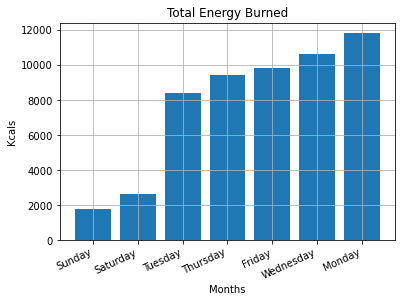

In [1643]:
mean_groupby_data_ser = utils.mean_of_attribute_in_group(grouped_by_day,"totalEnergyBurned")
sum_energy_burn = grouped_by_day["totalEnergyBurned"].sum()
sum_energy_burn.sort_values(ascending=True,inplace=True)
utils.bar_chart_example(sum_energy_burn.index,sum_energy_burn,"Total Energy Burned","Months","Kcals")

The first graph was very interesting and defintely suprising as even though wednesday is my most consistent day to workout and has the most workouts it does not have the most total energy burned. This can be explained when looking at the average Total energy burned as monday has a higher average than any other day. Not suprisingly Saturday and Sunday have the least amount of total energy burned and it seems as if I tired on those days as they have a lower average as well. The reason for Monday having a higher total energy burned even though I have less workouts then wednesday could be do to my workout schedule. Most times I do legs on monday to get it out of the way and normally leg day has a higher amount of calories burned as your legs are the biggest muscle group on your body. Next I am going to figure out the average duration too see if I workout shorter on Saturday and Sunday and to look for any other paterns. We going to use hypothesis testing now to make sure this is true. 

## Two-sample, one-tailed independent t-test of the total energy burned
> Is there significantly more energy burned on average on Monday versus the average energy burned on Wednesday.
### 1 Identify the null and alternative hypotheses
$H_0 = M_{Monday Energy Burned} \leq M_{Wed energy burned}$  
$H_1 = M_{Monday Energy Burned} > M_{Wed enrgy burned}$

### 2 Select the level of significance
The level of significance is $\alpha = .01$

### 3 Select the appropriate test statistic
Because it is a two independant one tailed test of means we will be using the formula: $t = \frac{\overline{X}_{exp}-\overline{x}_{cont}}{\sqrt{S_p^2(\frac{1}{n_1}+\frac{1}{n_2})}}$
### 4 Formulate the decision rule
$\alpha = .01$ 
df $= x_1 + x_2 -2$  

In [1644]:
monday = grouped_by_day.get_group("Monday")
monday_ser = monday["totalEnergyBurned"]
wed = grouped_by_day.get_group("Wednesday")
wed_ser = wed["totalEnergyBurned"]
print(len(monday),len(wed_ser))

13 15


df $ = 26$  
t-critical $= 2.479$
If t-computed > 2.479 then reject $H_0$  
If t-computed $\leq$ 2.479 then reject $H_1$

In [1659]:
utils.ttest_ind(monday_ser,wed_ser,0.01)

t: 2.3816768851249663 pval: 0.02484041921594078
do not reject H0



### 5 Make a decision
Since t_computed $\leq$ 2.492 then we do not reject $H_0$. Meaning that on average monday does not have significantly more energy burned compared to the rest of the week. While the p-value is very close with the alpha value that i chose for this problems states that it is not signifacntly more energy burned on mondays. Which is interesting meaning that even with my doing mostly leg day on monday while I do burn a higher total energy it is not significantly more on average. 

Now I am going to do some eda with the data that is merged with the weather. I am going to do this in the hopes of finding a correlation between my weather data and the amount I workout. The first thing I am going to do is print the average weather of when I workout versus the average weather of when I do not workout. I am also going to print the average wind speed and precipitation. 

31.90151515151516 43.311428571428586


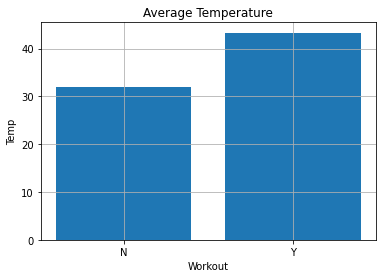

In [1646]:
grouped_by_workout = merged_df.groupby("Workout")
mean_groupby_data_ser = utils.mean_of_attribute_in_group(grouped_by_workout,"tavg")
print(mean_groupby_data_ser["N"],mean_groupby_data_ser["Y"])
utils.bar_chart_example_work(mean_groupby_data_ser.index,mean_groupby_data_ser,"Average Temperature","Workout","Temp")



So as we can see from the data on average temperature there is around a 12 degree different between weather I worked out or no. So this is very interesting as it points to there being a correlation in wether I workout or not. Now I am going to see if there is a correlation on wether I workout or not between precipitation and windspeed. 

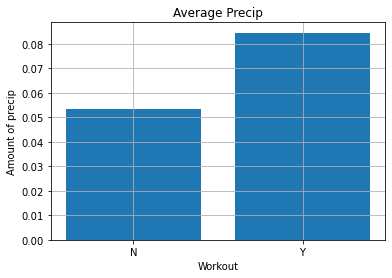

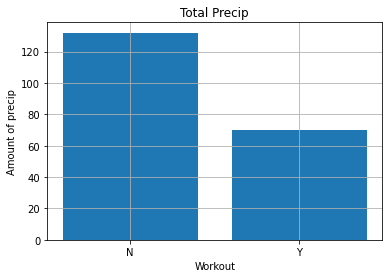

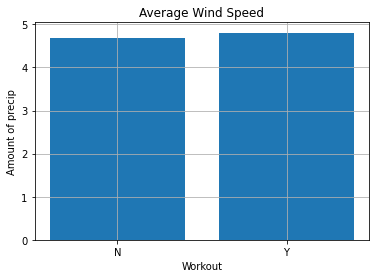

In [1647]:
mean_groupby_data_ser = utils.mean_of_attribute_in_group(grouped_by_workout,"prcp")
utils.bar_chart_example_work(mean_groupby_data_ser.index,mean_groupby_data_ser,"Average Precip","Workout","Amount of precip")
count_groupby_data_ser = utils.get_total_counts_weather(grouped_by_workout,"prcp")
utils.bar_chart_example_work(count_groupby_data_ser.index,count_groupby_data_ser,"Total Precip","Workout","Amount of precip")
mean_groupby_data_ser = utils.mean_of_attribute_in_group(grouped_by_workout,"wspd")
utils.bar_chart_example_work(mean_groupby_data_ser.index,mean_groupby_data_ser,"Average Wind Speed","Workout","Amount of precip")


The Average precipitation is partially miss leading because simply there are more times I didn't workout versus times I did workout and this means that there is going to be more zeroes in that data set because of days of no precip. But when looking at the total precipitation we can see that there is a much larger total of precipitation on days I do not wokout versus days that I do workout which is another interesting correlation. The windspeed shows that there is no correlation as there is almost the exact same average of wind speed between the two groups. 

Next I am going to do a ttest on wether or not I workout more in warm weather versus cold weather. The way I am going to do this is by using the average duration. Im going to set the duration to zero on the days I dont workout and I am going to classify the weather between warm and cold and use this to group together the data. Because the duration of days I dont workout is going to be zero the average for the one I workout less in is going to be the group with the lowest average. So before I do the test I am going to put zero for all of the days I didn't workout and then I am going to make a new attribute cold versus warm. 

In [1648]:
ser = merged_df["duration"].copy()
ser_work = merged_df["Workout"].copy()
for i in range(len(ser)):
    curr_val = str(ser_work.iloc[i])
    if curr_val == 'N':
        ser.iloc[i] = 0
    else:
        ser.iloc[i] = ser.iloc[i]
merged_df["duration"] = ser
ser_tmp = merged_df["Workout"].copy()
ser = merged_df["tavg"].copy()
for i in range(len(ser)):
    curr_val = (ser.iloc[i])
    if curr_val > 30:
        ser_tmp.iloc[i] = "warm"
    else:
        ser_tmp.iloc[i] = "cold"
merged_df["Warm or Cold"] = ser_tmp
merged_df.to_csv("merged_workout.csv")

## Two sample test one tailed independent test dealing with warm versus cold weather
> Do I workout duration average in cold weather versus when I workout in warm weather
### Null and alternate hypothesis
$H_0 = M_{Warm Duration} \leq M_{Cold Duration}$  
$H_1 = M_{Warm Duration} > M_{Cold Duration}$

### 2 Select the level of significance
The level of significance is $\alpha = .01$

### 3 Select the appropriate test statistic
Because it is a two independant one tailed test of means we will be using the formula: $t = \frac{\overline{X}_{exp}-\overline{x}_{cont}}{\sqrt{S_p^2(\frac{1}{n_1}+\frac{1}{n_2})}}$
### 4 Formulate the decision rule
$\alpha = .01$ 
df $= x_1 + x_2 -2$  

In [1649]:
group_cold_warm = merged_df.groupby("Warm or Cold")
cold = group_cold_warm.get_group("cold")
cold_ser = cold["duration"]
warm = group_cold_warm.get_group("warm")
warm_ser = warm["duration"]
print(len(cold_ser), len(warm_ser))

51 151


df $ = 200$  
t-critical $= 2.345$
If t-computed > 2.345 then reject $H_0$  
If t-computed $\leq$ 2.345 then reject $H_1$

In [1661]:
utils.ttest_ind(cold_ser,warm_ser,0.01)

t: -4.74108196658424 pval: 4.032518185349708e-06
reject H0


So as can be seen from the ttest I do workout more when it is warm out compared to when it is cold at a .o1 level of significance. This is not even clos, as can be seen by the pval, meaning that there is defintely a comparison between the weather and the amount I workout. Now some things could affect the amount this data the biggest reason being I chose what weather to call cold. I made the determinate temperature 30 degrees which I would consider being cold. So we know that there is a affect on my workouts from temperature so now I am going to do another ttest to see if there is a correlation between preciptation. I am going to follow the same technique that I did for temperature where I split it up into cold and warm except this time I am going to split it up into windy and not windy. I am going to be testing different amount of precipitation but for the first test I am going to use .200

In [1651]:
ser_tmp = merged_df["Workout"].copy()
ser = merged_df["prcp"].copy()
for i in range(len(ser)):
    curr_val = (ser.iloc[i])
    if curr_val > .175:
        ser_tmp.iloc[i] = "Y"
    else:
        ser_tmp.iloc[i] = "N"
merged_df["Precip"] = ser_tmp

## Two sample test one tailed independent test
> Do I workout duration average in cold weather versus when I workout in warm weather
### Null and alternate hypothesis
$H_0 = M_{Rain Duration} \leq M_{No Rain Duration}$  
$H_1 = M_{Rain Duration} > M_{No Rain Duration}$

### 2 Select the level of significance
The level of significance is $\alpha = .01$

### 3 Select the appropriate test statistic
Because it is a two independant one tailed test of means we will be using the formula: $t = \frac{\overline{X}_{exp}-\overline{x}_{cont}}{\sqrt{S_p^2(\frac{1}{n_1}+\frac{1}{n_2})}}$
### 4 Formulate the decision rule
$\alpha = .01$ 
df $= x_1 + x_2 -2$  
df $ = 200$  
t-critical $= 2.345$
If t-computed > 2.345 then reject $H_0$  
If t-computed $\leq$ 2.345 then reject $H_1$

In [1660]:
group_cold_warm = merged_df.groupby("Precip")
rain = group_cold_warm.get_group("Y")
rain_ser = rain["duration"]
no_rain = group_cold_warm.get_group("N")
no_rain_ser = no_rain["duration"]
utils.ttest_ind(rain_ser,no_rain_ser,0.01)

t: 1.2614596611196285 pval: 0.2086126019989426
do not reject H0


So this test shows us to not reject our null hypothesis at the .01 level of significance. So this shows that there is not significantly less workouts when it is raining. So this is interesting because there is significantly more rain in the days I don't workout but over my whole data set rain does not keep me from working out. Now I am going to try to do some classification. 

## Classification
Now that we have done some hypothesis test and EDA I am going to do some knn and decision tree classification. The atribute that I am going to be predicting is the "Workout" class. It is a simple Y or N and it states wether or not I worked out today. The X that I am going to use is the temperature, wind, and rain. Because even though in the wind and rain class the averages are about the same the totals are different meaning that a lot of times I didn't workout there was more amount of rain. The temperature attribute definetly has a correlation to the "Workout" attribute so it will be interesting to see how well or classifiers do. So first I am going to be using the [KNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Meaning that I am going to scale my X and fit it and then i am going to use the holdout method using train_test_split. Meaning that I am going to use a part of my data set as the test set. In this instance I am going to take out a quarter of the data set. 

The K nearest Neighors finds the most frequent class labels amognst the k nearest neighbors. Meaning with all the data scaled it then finds the k closest neighbors and takes the most frequent class label among them. In this instance I used k=5 because after running it a few times I found that 35 has the highest accuracy. The y is also going to be stratified meaning that in the y test the amount of N and Y is going to be similar to the amount in the data set. The original split of class Identifiers is 64% N and 36% Y so the testing set will have the same ratio involved. 

In [1682]:
accuracy = utils.knn_classifier(merged_df)
print("Accuracy:",accuracy)

Accuracy: 0.7647058823529411


So we can see that suprisngly it is relatively accurate at predicting our class label. I am using [sklearn's accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to measure the accuracy. With it doing random test sets the accuracy is between 65-80% so it does vary a good amount but overall it is relatively accurate. Now I am going to use the decision tree classifier and see how the two compare. [The decision tree classifier](https://scikit-learn.org/stable/modules/tree.html#tree) is going to be very useful in this as it is easy to do and if I chose to it is easy to visualize and understand. I am going to use the same train test split that I used for the kNN classifier as well as the same accuracy score.

In [1663]:
accuracy = utils.decision_tree(merged_df)
print("Accuracy:",accuracy)

Accuracy: 0.803921568627451


So after viewing the results we see that they are very similar in predicting the class label but it seems the decision tree classifier is slightly better. Not by much but it does seem to have higher accuracy then the kNN classifier. Overall both of these classifiers similarily are about 75% accurate most of the time. Because the test set is randomized it differs test to test but overal it is about 75% accurate on average. 

A big challenge for classification is having a big enough data set. having a large data set is a huge bonus to making the classifier more efficient. Because the training set gets bigger so the machine can learn more and find more patterns in the data. That was definitely a challenge with this project specifically. Another problem in the project was that prcp and wdsp didn't have the strongest correlation to wether I worked out or not. While there was definitely more precipitation in the N group the averages were bascially even as all the zeroes seem to even it out. That was another problem with this classification. Overall however, I am very happy with the success of the classifiers. They got around 75% accuracy on average which is suprising especially with how it looked when the averages of wdsp and prcp were visualized.

## Conclusion 
So overall the final data set after all the merging included the attributes:
* Date: this is simply the date of the workout in the format YYYY-MM-DD  
* Activity Type: This just declares the activity type which is Traditional Strength Training  
* Duration: This is the duration of the workout that is originally in seconds but during the cleaning part of this project gets turned into minutes  
* Total Energy Burned: This attribute gives the total energy burned and is given in Kcals
* HKAverageMETs: This is the amount of Kcals I burn per hour times my weight in kilograms
* Month: The month that the instance occured in
* Day of Week: The day of the week that the instance occured in.
* tavg: The average temperature in the day in Fahrenheit.
* prcp: The daily precipitation levels in inches
* wdir: the direction of the wind in degrees
* wdsp: The average windspeed in miles per hour
* pres: The average sea-level air pressure
* Workout: says wether I worked out on that day. 
* Warm or Cold: is based off of the temperature of that day and decides it is a cold or warm day.
* Precip: is based off the prcp attriute and states wether or not the day constituted as a rainy or not rainy day.

The classification section went well as I used the train_test_split with a 25% split, meaning 25% of the data set was in the test and the rest was in the training set, and I had it stratified as well so the ratio of class labels is the same in the test set as it is in the training set. The decision tree classifier worked slightly better than the kNN classifier as well. It wasn't extremely accuracte but it still could predict around 75%. The biggest thing that I believe I could do to improve it is simply get more data. This data set isn't the largest data set as it is limited to 202 instances, except more than half are of days I did not workout, so imoroving its length is the best thing that I could do to improve the classification.

With this project I believe that it would not be too invading into peoples lives and privacy to be ethically wrong. It of course could be pushed to another level where more attributes are brought in that make it wrong. But where it is now and with the results that were gathered I do not see the problem. It is simply taking the weather and wether or not I went to the gym and finding a correlation between the two. A stakeholder could use this data to figure out when to nudge people to attend the gym and to continue to workout. It is not invading into someones lives but simply figuring out if they are likely to go to the gym today or not. Like it was brought up in the introduction this could also be used by trainers or apps that would push the user to go to the gym a little extra on days where it is likely they will skip. These results I believe are helpful and not invasive. Now the impacts were illuded to in the past sentences. It could be used by training app or coaches to figure out patterns in their clients workout schedule. So that they know when they are more likely to skip and make sure that they do not skip. Also for stakeholders who own declining gyms this can be used to try and bring people back in on days where attendance is most likely to be low.